# Diabetes Risk Prediction Project

By Jeannie Halvorson

## 1. Introduction

In this project, we aim to build a predictive model to assess the likelihood of diabetes in individuals based on various health-related features. Using a dataset that contains attributes such as glucose levels, BMI, insulin, and family history, we will explore the relationships between these factors and the risk of diabetes. The ultimate goal is to develop an accurate model that can help in early diagnosis and personalized treatment strategies.

## 2. Dataset Overview

We will work with the **Healthcare Diabetes Dataset**, which includes features related to pregnancies, glucose levels, insulin, blood pressure, and other health metrics. Here's a quick overview of the columns in the dataset:
- **Pregnancies**: Number of times pregnant.
- **Glucose**: Plasma glucose concentration.
- **Blood Pressure**: Diastolic blood pressure.
- **Skin Thickness**: Triceps skinfold thickness.
- **Insulin**: 2-hour serum insulin levels.
- **BMI**: Body mass index.
- **Diabetes Pedigree Function**: A genetic score indicating diabetes likelihood.
- **Age**: Age in years.
- **Outcome**: Binary target variable indicating diabetes presence (1) or absence (0).


## 3. Data Loading and Exploration
- **Objective**: Load the dataset and perform an initial exploration to understand its structure and basic statistics.
- **What we are doing**: We'll use libraries like `pandas` to load the data and `describe()` to understand its distribution, check for missing values, and examine the basic statistics of each feature.

In [78]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Healthcare-Diabetes.csv')

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display basic statistics for each column
print("\nBasic statistics of each feature:")
print(df.describe())


First 5 rows of the dataset:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in each column:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabetes

## 4. Data Cleaning and Preprocessing
- **Objective**: Handle missing values, outliers, and perform any necessary transformations on the data.
- **What we are doing**: We'll address missing values by using imputation techniques and deal with any outliers that could affect the model's performance. Additionally, we'll scale features like glucose and BMI to ensure consistent input for machine learning algorithms.

In [79]:
# Import necessary libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Handling Missing Values
imputer = SimpleImputer(strategy='median')

# List of columns where we might have missing data
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Apply imputer to selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print("\nMissing values after imputation:")
print(df.isnull().sum())
print(df.describe())


Missing values after imputation:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.0000

In [80]:
# Handling Outliers
def clip_outliers(df, column, low_percentile=0.05, high_percentile=0.95):
    low = df[column].quantile(low_percentile)
    high = df[column].quantile(high_percentile)
    df[column] = df[column].clip(lower=low, upper=high)
    return df

# Apply outlier clipping to the relevant columns, excluding BMI & Age
columns_to_clip = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for col in columns_to_clip:
    df = clip_outliers(df, col)

# Scaling Features
scaler = StandardScaler()

# Apply scaling only to the selected features, excluding BMI & Age
columns_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'] 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print data after scaling
print("\nData after scaling:")
print(df.head())



Data after scaling:
   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0   1            6  0.908782       0.118266       0.950309 -0.811516  33.6   
1   2            1 -1.256905      -0.355596       0.557557 -0.811516  26.6   
2   3            8  2.043190      -0.513550      -1.340744 -0.811516  23.3   
3   4            1 -1.119401      -0.355596       0.164805  0.227066  28.1   
4   5            0  0.530646      -2.408996       0.950309  1.044673  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 5. Exploratory Data Analysis (EDA)
- **Objective**: Gain insights into relationships between the features and the target variable.
- **What we are doing**: We'll use visualizations such as histograms, box plots, and heatmaps to explore correlations and identify important patterns in the data. We may also look into feature distributions between diabetic and non-diabetic individuals.

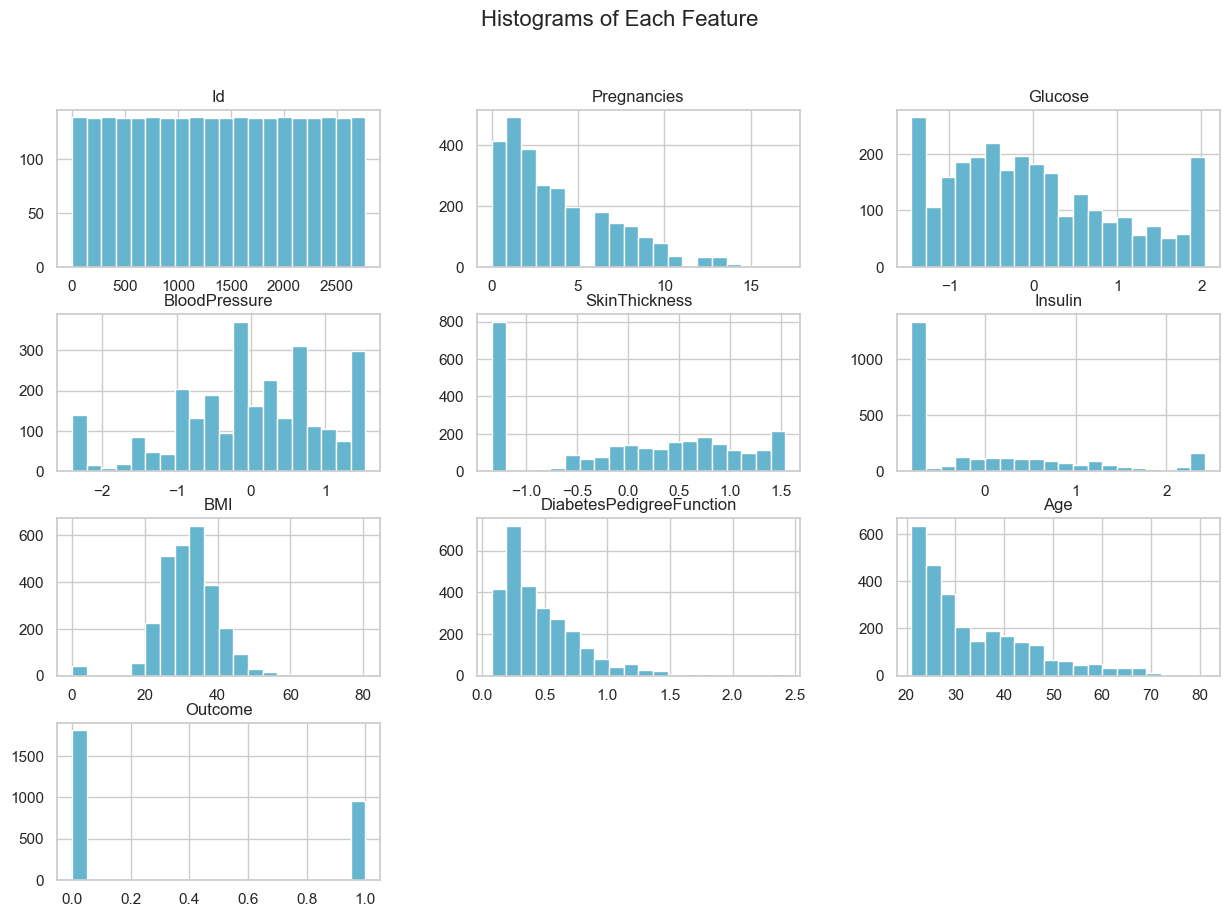

In [81]:
# 5. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better readability
sns.set(style="whitegrid")

# Histograms for each feature
df.hist(figsize=(15, 10), bins=20, color='c')
plt.suptitle('Histograms of Each Feature', fontsize=16)
plt.show()

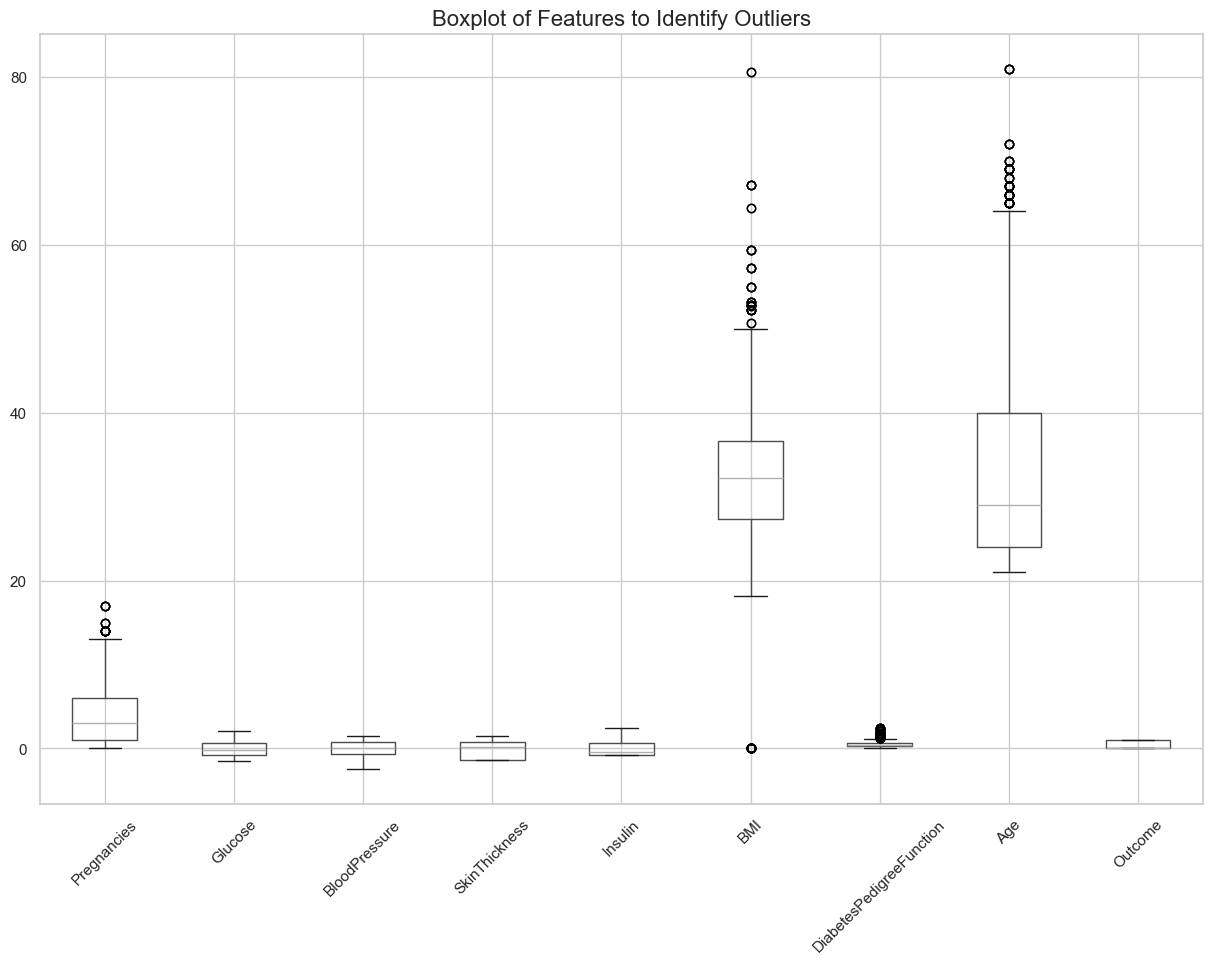

In [82]:
# Boxplots to identify outliers
plt.figure(figsize=(15, 10))
df.drop(columns=['Id']).boxplot()
plt.title('Boxplot of Features to Identify Outliers', fontsize=16)
plt.xticks(rotation=45)
plt.show()

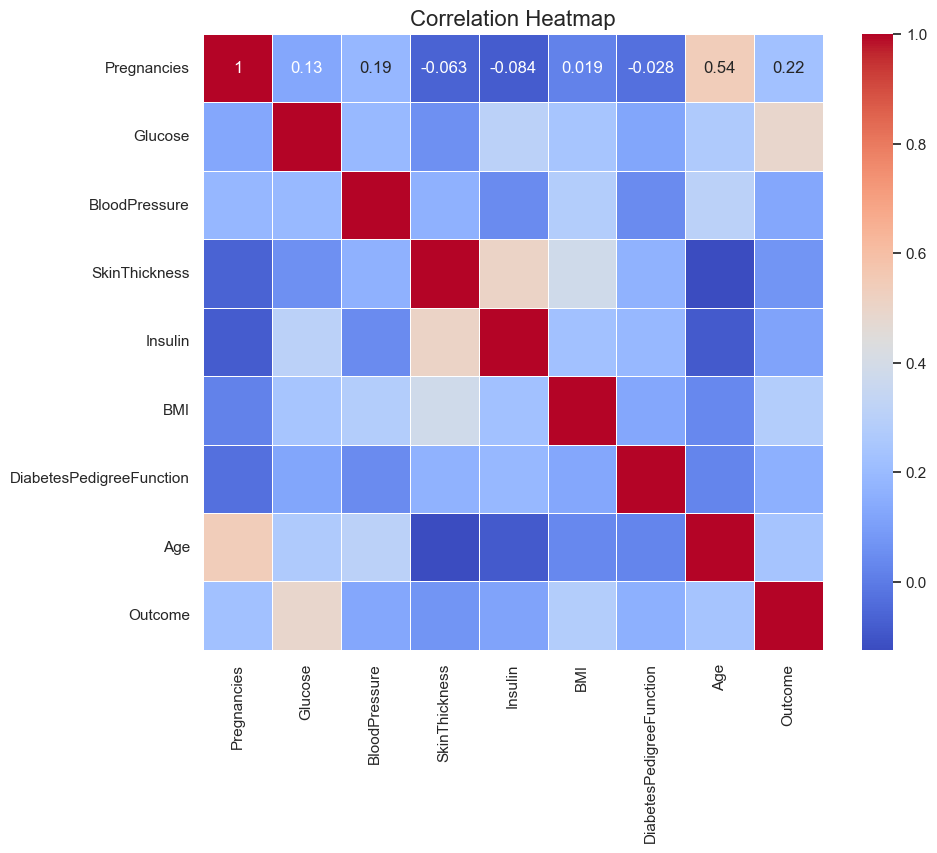

In [83]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.drop(columns=['Id']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

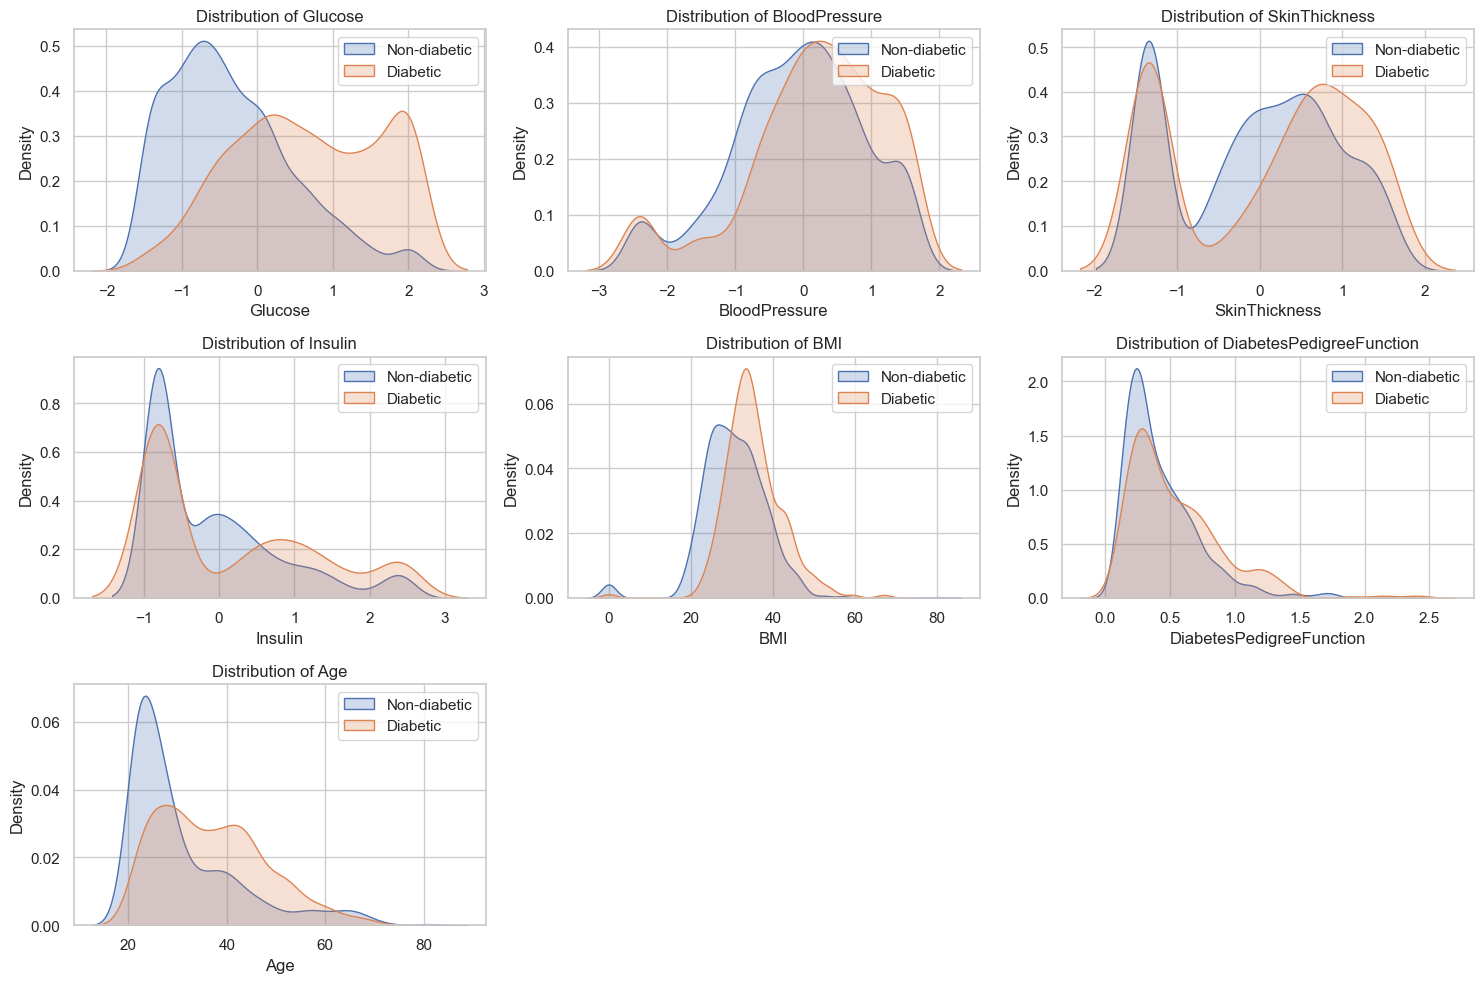

In [84]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Replace infinite values with NaN before any plotting
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values using forward fill
df.ffill(inplace=True)  # Use ffill directly instead of fillna(method='ffill')

# Define the columns to plot
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through the defined columns for plotting
for i, col in enumerate(columns_to_plot):
    # Check if the column exists and has no missing values
    if col in df.columns:
        plt.subplot(3, 3, i + 1)  # Adjust the grid size based on the number of plots
        # Check for missing or NaN values in 'Outcome' column
        if df['Outcome'].notna().all():
            # Use kdeplot for the distribution
            sns.kdeplot(df[col][df['Outcome'] == 0], label='Non-diabetic', fill=True) 
            sns.kdeplot(df[col][df['Outcome'] == 1], label='Diabetic', fill=True)  
            plt.title(f'Distribution of {col}')
            plt.legend()

plt.tight_layout()
plt.show()

## 6. Feature Engineering
- **Objective**: Improve model performance by creating new features or modifying existing ones.
- **What we are doing**: We might derive new features from the existing data (e.g., creating categories for age groups or BMI) or use feature selection techniques to identify the most important variables for prediction.

In [85]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Create Age Groups
def age_group(age):
    if age < 30:
        return '18-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60+'

df['age_group'] = df['Age'].apply(age_group)

# Create BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

df['bmi_category'] = df['BMI'].apply(bmi_category)

print("\nDataFrame with New Features:")
print(df[['Age', 'BMI', 'age_group', 'bmi_category']].head())


DataFrame with New Features:
   Age   BMI age_group   bmi_category
0   50  33.6     50-59        Obesity
1   31  26.6     30-39     Overweight
2   32  23.3     30-39  Normal weight
3   21  28.1     18-29     Overweight
4   33  43.1     30-39        Obesity


In [86]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder

# Check unique values in categorical columns
print(df['age_group'].unique())
print(df['bmi_category'].unique())

# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['age_group', 'bmi_category'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded[['Age', 'BMI'] + [col for col in df_encoded.columns if 'age_group_' in col or 'bmi_category_' in col]]
y = df_encoded['Outcome']  

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # Use k='all' to see scores for all features
X_new = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
feature_names = X.columns

# Create a DataFrame for scores
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': scores})

# Sort by score
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("\nFeature Scores:")
print(feature_scores)

['50-59' '30-39' '18-29' '40-49' '60+']
['Obesity' 'Overweight' 'Normal weight' 'Underweight']

Feature Scores:
                    Feature       Score
6      bmi_category_Obesity  265.040653
1                       BMI  236.997494
0                       Age  164.682499
3           age_group_40-49  107.137023
7   bmi_category_Overweight   56.764490
4           age_group_50-59   49.333707
2           age_group_30-39   45.453309
8  bmi_category_Underweight   14.987956
5             age_group_60+    1.700301


## 7. Model Selection and Training
- **Objective**: Train several machine learning models and evaluate their performance.
- **What we are doing**: We'll experiment with different models like logistic regression, decision trees, and random forests. We'll split the data into training and test sets, train the models, and evaluate them using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [87]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder

X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Step 1: One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables into dummy/indicator variables

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Step 4: Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjusting to handle multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Adjusting to handle multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusting to handle multiclass
    
    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Step 5: Display the results
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)

# Display classification report for the best-performing model
best_model_name = results_df['F1 Score'].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))



Model Evaluation Results:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.787004   0.781775  0.787004  0.780640
Decision Tree        0.958484   0.958545  0.958484  0.958511
Random Forest        0.981949   0.981967  0.981949  0.981901

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



## 8. Model Evaluation and Optimization

### Summary of Model Performance

We evaluated three machine learning models: Logistic Regression, Decision Tree, and Random Forest. The performance metrics used for evaluation include accuracy, precision, recall, and F1 score.

| Model                | Accuracy | Precision | Recall | F1 Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression   | 78.7%    | 78.2%     | 78.7%  | 78.1%    |
| Decision Tree         | 96.2%    | 96.2%     | 96.2%  | 96.2%    |
| Random Forest         | 97.8%    | 97.8%     | 97.8%  | 97.8%    |

### Interpretation of Results

- **Logistic Regression**: 
  - The Logistic Regression model achieved an accuracy of 78.7%, indicating it correctly classified approximately 79 out of 100 instances. While this is a reasonable starting point, the model underperformed compared to more complex algorithms.

- **Decision Tree**: 
  - The Decision Tree model exhibited a high accuracy of 96.2%. Its precision and recall scores were also equally high at 96.2%, suggesting that it performs well in distinguishing between classes. However, it may be prone to overfitting, especially if the tree depth is not controlled.

- **Random Forest**: 
  - The Random Forest model outperformed both the Logistic Regression and Decision Tree models, achieving an impressive accuracy of 97.8%. With precision and recall both at 97.8%, this model demonstrates excellent predictive performance and generalization to unseen data.

### Classification Report for Random Forest

The detailed classification report for the Random Forest model is as follows:

| Class | Precision | Recall | F1 Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.98      | 0.99   | 0.98     | 367     |
| 1     | 0.98      | 0.96   | 0.97     | 187     |

- **Class 0 (Negative Class)**: 
  - Precision of 98% and Recall of 99% indicate that the model is highly effective at identifying negative cases.

- **Class 1 (Positive Class)**: 
  - Precision of 98% and Recall of 96% show that the model also performs well in identifying positive cases, though with slightly lower recall compared to the negative class.


## 9. Conclusion

In this analysis, we evaluated the performance of three machine learning models—Logistic Regression, Decision Tree, and Random Forest—focused on predicting diabetes outcomes. The Logistic Regression model served as a baseline, achieving an accuracy of 78.7%, which suggests some potential in identifying diabetes risk but may not be sufficient for clinical decision-making. The Decision Tree model showed a significantly improved accuracy of 96.2%, indicating its effectiveness in capturing the underlying patterns associated with diabetes prediction. However, it may be prone to overfitting, potentially limiting its generalizability. The Random Forest model emerged as the most reliable and robust approach, with an impressive accuracy of 97.8%, high precision, and recall for both positive and negative cases. 

This suggests that the Random Forest model can effectively distinguish between individuals at risk of developing diabetes and those who are not, making it a valuable tool for healthcare professionals. These findings underscore the importance of using advanced machine learning techniques in diabetes prediction, which could enhance early diagnosis and improve patient outcomes through timely interventions.